In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys

# Test 1

We have a 2D domain with a constant zonal and zero meridional wind stress. We assume that the only non-zero terms in the Navier Stokes equations are the Coriolis and forcing terms. We have analytical solutions for the same, and by performing a numerical simulation for two time steps, we hope to match these results with analytical solutions.

The two equations are:

$$\frac{\partial (u_m h_m)}{\partial t} = \frac{\tau_x}{\rho_0} + fv_m h_m,$$
$$\frac{\partial (v_m h_m)}{\partial t} = \frac{\tau_y}{\rho_0} - fu_m h_m.$$

We simulate these equations for two time steps. After doing an initial analysis with t = 20 seconds, $u_m = 1.3 \times 10^{-5} m/s$ and $v_m = -9.46 \times 10^{-9} m/s$. These results match the analytical results, so we conclude that the coriolis and wind stress functions are correct.

In [6]:
Lx,Ly = 4100,4000
nx,ny = 52,50
dx,dy = Lx/nx,Ly/ny

g = 9.81
rho0 = 1025
r0 = 6.378*10**6
day = 24*60*60 # length of day [seconds]
omega = 2*np.pi / day
f = 2*omega*np.sin(np.deg2rad(30))

xu_ocean = np.linspace(0,Lx,nx,dtype = float)
yu_ocean = np.linspace(0,Ly,ny,dtype = float)
Y,X = np.meshgrid(yu_ocean,xu_ocean)

In [14]:
tau_x = 0.05*np.ones((nx,ny))
tau_y = np.zeros((nx,ny))
MLD_0 = -150*np.ones((nx,ny))

In [15]:
def forcing_Euler(tau,hm_new):
    f3 = tau/(rho0*hm_new)
    return f3

def cor_Euler(vel,hm_old,hm_new):
    f3 = -(1/hm_new)*f*vel*hm_old
    return f3

In [16]:
um_old = np.zeros((nx,ny))
um_new = np.zeros((nx,ny))
vm_old = np.zeros((nx,ny))
vm_new = np.zeros((nx,ny))
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 40
dt = 20
for t in np.arange(t_start,t_end,dt):
    um_new = um_old + dt*forcing_Euler(tau_x,hm_new) + dt*cor_Euler(-vm_old,hm_old,hm_new)
    vm_new = vm_old + dt*forcing_Euler(tau_y,hm_new) + dt*cor_Euler(um_old,hm_old,hm_new)
    
    um_old = um_new
    vm_old = vm_new
    
    print(t/dt)

0.0
1.0


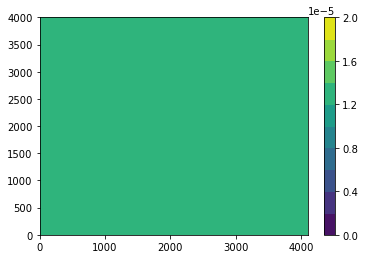

In [17]:
plt.contourf(X,Y,um_new,levels = np.linspace(0,2e-5,11))
plt.colorbar()

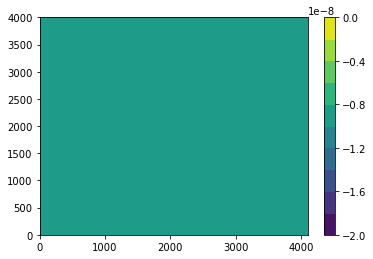

In [22]:
plt.contourf(X,Y,vm_new,levels = np.linspace(-2e-8,0,11))
plt.colorbar()

# Test 2

We now jump on to the difficult part: advection. We perform a simple experiment - There is a 1D domain with a sine curve to be advected. We first consider u as a tracer and advect it with a constant velocity a, and then use the full non-linear convective term. The boundaries have Neumann boundary condition ($\frac{\partial u}{\partial x} =  0$).The equation we use are laid down below:

$$\frac{\partial (u_m h_m)}{\partial t} + a \frac{\partial (u_m h_m)}{\partial x} = 0,$$
$$\frac{\partial (u_m h_m)}{\partial t} + \frac{\partial (u_m u_m h_m)}{\partial x} = 0.$$

The results for constant advective speed are: We get stable advection, but only for a certain combination of advective speed and finite difference schemes. If a is positive(negative), we need backward(forward) difference.

The results for non-linear equation are: We get unstable convection for forward, backward and central differences, and for all values of spatial and temporal resolutions.

In [371]:
Lx = 100
nx = 50
dx = Lx/nx
g = 9.81
rho0 = 1025

xu_ocean = np.linspace(0,Lx,nx,dtype = float)

In [372]:
def partial_x(f,dx):
    dfdx = 1/(dx) * (f[1:nx-1] - f[0:nx-2])  #Backward differerence for positive advection velocity
    #dfdx = 1/(2*dx) *(f[2:nx] - f[0:nx-2])
    return dfdx

def adv_x_Euler(f1,hm_old,hm_new):
    a = 0.5 #Speed of advection
    #f3 = -(1/hm_new[1:nx-1])*partial_x(hm_old*f1**2,dx)
    f3 = -(1/hm_new[1:nx-1])*a*partial_x(hm_old*f1,dx)
    return f3

In [373]:
MLD_0 = -150*np.ones(nx)

um_old = np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5
um_new = np.zeros(nx)
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 36
dt = 2
for t in np.arange(t_start,t_end,dt):
    um_new[1:nx-1] = um_old[1:nx-1] + dt*adv_x_Euler(um_old,hm_old,hm_new)
    
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    um_old = um_new

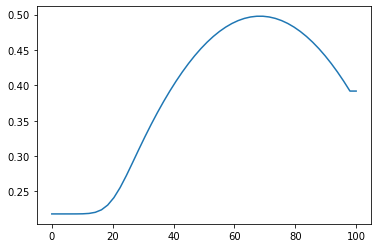

In [374]:
plt.plot(xu_ocean,um_new)

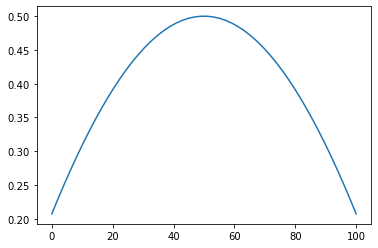

In [376]:
plt.plot(xu_ocean,np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5)

# Test 3

In [361]:
Lx = 100
nx = 50
dx = Lx/nx
g = 9.81
rho0 = 1025

xu_ocean = np.linspace(0,Lx,nx,dtype = float)

In [367]:
def partial_x(f,dx):
    #dfdx = 1/(dx) * (f[1:nx-1] - f[0:nx-2])  #Backward differerence for positive advection velocity
    dfdx = 1/(2*dx) *(f[2:nx] - f[0:nx-2])
    return dfdx

def adv_x_Euler(f1,hm_old,hm_new):
    a = 0.5 #Speed of advection
    #f3 = -(1/hm_new[1:nx-1])*partial_x(hm_old*f1**2,dx)
    f3 = -(1/hm_new[1:nx-1])*a*partial_x(hm_old*f1,dx)
    return f3

def diff_Euler(um_old,dx):
    f3 = (um_old[2:nx] - 2*um_old[1:nx-1] + um_old[0:nx-2])/(dx**2)
    return f3

In [368]:
MLD_0 = -150*np.ones(nx)
nu_x = 1

um_old = np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5
um_new = np.zeros(nx)
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 40
dt = 2
for t in np.arange(t_start,t_end,dt):
    um_new[1:nx-1] = um_old[1:nx-1] + dt*adv_x_Euler(um_old,hm_old,hm_new) + dt*nu_x*diff_Euler(um_old,dx)
    
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    um_old = um_new

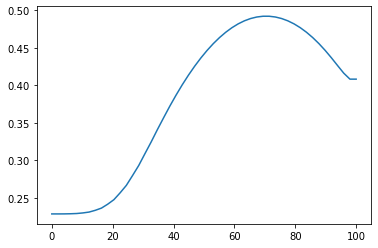

In [369]:
plt.plot(xu_ocean,um_new)

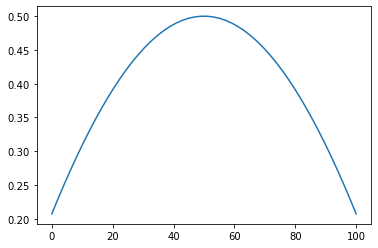

In [370]:
plt.plot(xu_ocean,np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5)

# Test 4

In [9]:
Lx = 100
nx = 50
dx = Lx/nx
g = 9.81
rho0 = 1025

xu_ocean = np.linspace(0,Lx,nx,dtype = float)

In [10]:
def partial_x(f,dx):
    #dfdx = 1/(dx) * (f[1:nx-1] - f[0:nx-2])  #Backward differerence for positive advection velocity
    dfdx = 1/(2*dx) *(f[2:nx] - f[0:nx-2])
    return dfdx

def adv_x_Euler(f1,hm_old,hm_new):
    a = 0.5 #Speed of advection
    f3 = -(1/hm_new[1:nx-1])*partial_x(hm_old*f1**2,dx)
    #f3 = -(1/hm_new[1:nx-1])*a*partial_x(hm_old*f1,dx)
    return f3

def diff_Euler(um_old,dx):
    f3 = (um_old[2:nx] - 2*um_old[1:nx-1] + um_old[0:nx-2])/(dx**2)
    return f3

In [28]:
MLD_0 = -150*np.ones(nx)
nu_x = 1

um_old = np.sin(np.pi*xu_ocean/(2*Lx) + np.pi/4) - 0.5
um_new = np.zeros(nx)
hm_old = -MLD_0
hm_new = hm_old

t_start = 0
t_end = 80
dt = 2

um_plot = np.zeros((nx,int(t_end/dt)))
for t in np.arange(t_start,t_end,dt):
    um_new[1:nx-1] = um_old[1:nx-1] + dt*adv_x_Euler(um_old,hm_old,hm_new) + dt*nu_x*diff_Euler(um_old,dx)
    
    um_new[0] = um_new[1]
    um_new[-1] = um_new[-2]
    um_old = um_new
    
    um_plot[:,int(t/dt)] = um_old

In [14]:
plt.plot(xu_ocean,um_new)
plt.show()

<IPython.core.display.Javascript object>


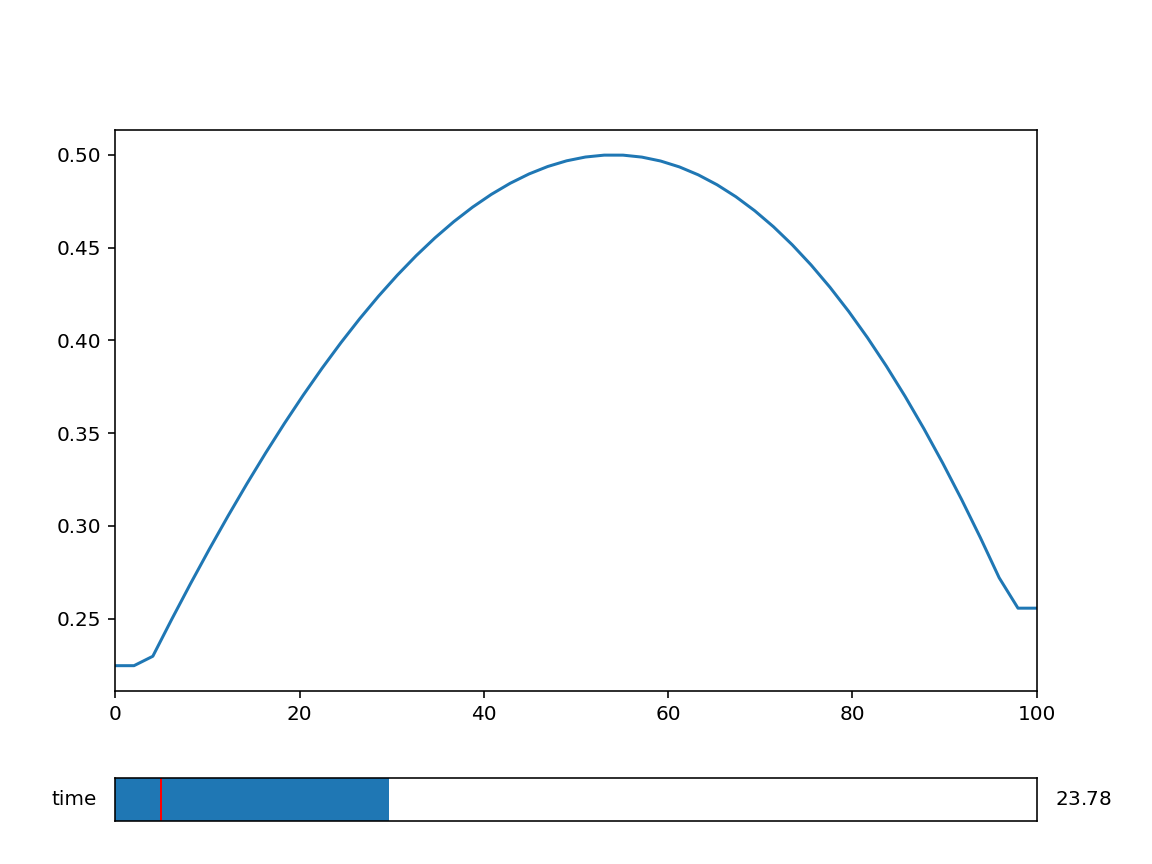

In [31]:
fig = plt.figure(figsize=(8,6))
figure_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])
plt.axes(figure_ax)
plt.xlim(0, Lx)
#plt.ylim(0.2,0.5)

p1 = plt.plot(xu_ocean,um_plot[:,1])

a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'time',            # the name of the slider parameter
                  t_start,          # minimal value of the parameter
                  t_end,          # maximal value of the parameter
                  valinit = 4  # initial value of the parameter
                 )

def update(time):
    p1.set_ydata(np.sin(a*x)) # set new y-coordinates of the plotted points
    p1.set_ydata(um_plot[:,time])
    fig.canvas.draw_idle()
    
a_slider.on_changed(update)

plt.show()

In [384]:
from matplotlib.widgets import Slider

In [386]:
ax_slide = plt.axes([0.25, 0.1, 0.65, 0.03])
s_factor = Slider(ax_slide, 'Smoothing factor', 0.1, 6, valinit=6, valstep=0.2)

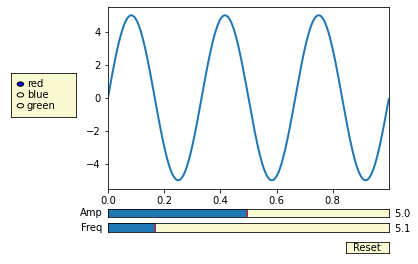

In [387]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.widgets import Slider, Button, RadioButtons

fig, ax = plt.subplots()
plt.subplots_adjust(left=0.25, bottom=0.25)
t = np.arange(0.0, 1.0, 0.001)
a0 = 5
f0 = 3
delta_f = 5.0
s = a0 * np.sin(2 * np.pi * f0 * t)
l, = plt.plot(t, s, lw=2)
ax.margins(x=0)

axcolor = 'lightgoldenrodyellow'
axfreq = plt.axes([0.25, 0.1, 0.65, 0.03], facecolor=axcolor)
axamp = plt.axes([0.25, 0.15, 0.65, 0.03], facecolor=axcolor)

sfreq = Slider(axfreq, 'Freq', 0.1, 30.0, valinit=f0, valstep=delta_f)
samp = Slider(axamp, 'Amp', 0.1, 10.0, valinit=a0)


def update(val):
    amp = samp.val
    freq = sfreq.val
    l.set_ydata(amp*np.sin(2*np.pi*freq*t))
    fig.canvas.draw_idle()


sfreq.on_changed(update)
samp.on_changed(update)

resetax = plt.axes([0.8, 0.025, 0.1, 0.04])
button = Button(resetax, 'Reset', color=axcolor, hovercolor='0.975')


def reset(event):
    sfreq.reset()
    samp.reset()
button.on_clicked(reset)

rax = plt.axes([0.025, 0.5, 0.15, 0.15], facecolor=axcolor)
radio = RadioButtons(rax, ('red', 'blue', 'green'), active=0)


def colorfunc(label):
    l.set_color(label)
    fig.canvas.draw_idle()
radio.on_clicked(colorfunc)

plt.show()

<IPython.core.display.Javascript object>


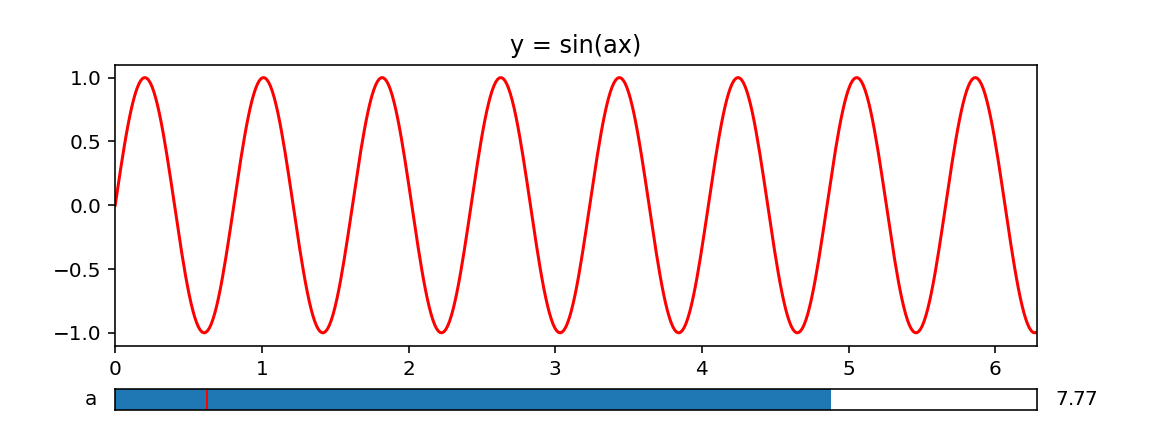

In [3]:
from matplotlib.widgets import Slider  # import the Slider widget

import numpy as np
import matplotlib.pyplot as plt
from math import pi
%matplotlib notebook

a_min = 0    # the minimial value of the paramater a
a_max = 10   # the maximal value of the paramater a
a_init = 1   # the value of the parameter a to be used initially, when the graph is created

x = np.linspace(0, 2*pi, 500)

fig = plt.figure(figsize=(8,3))

# first we create the general layount of the figure
# with two axes objects: one for the plot of the function
# and the other for the slider
sin_ax = plt.axes([0.1, 0.2, 0.8, 0.65])
slider_ax = plt.axes([0.1, 0.05, 0.8, 0.05])


# in plot_ax we plot the function with the initial value of the parameter a
plt.axes(sin_ax) # select sin_ax
plt.title('y = sin(ax)')
sin_plot, = plt.plot(x, np.sin(a_init*x), 'r')
plt.xlim(0, 2*pi)
plt.ylim(-1.1, 1.1)

# here we create the slider
a_slider = Slider(slider_ax,      # the axes object containing the slider
                  'a',            # the name of the slider parameter
                  a_min,          # minimal value of the parameter
                  a_max,          # maximal value of the parameter
                  valinit=a_init  # initial value of the parameter
                 )

# Next we define a function that will be executed each time the value
# indicated by the slider changes. The variable of this function will
# be assigned the value of the slider.
def update(a):
    sin_plot.set_ydata(np.sin(a*x)) # set new y-coordinates of the plotted points
    fig.canvas.draw_idle()          # redraw the plot

# the final step is to specify that the slider needs to
# execute the above function when its value changes
a_slider.on_changed(update)

plt.show()